# Import libraries, initialize base model

In [1]:
# Import libraries
from tensorflow.python.keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
%matplotlib inline

# Import module that I wrote
from neural_style_transfer import *

In [2]:
# Create base model based on VGG19
model = VGG19(
    include_top = False,
    weights = 'imagenet'
)

model.trainable = False
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

# Create a neural signal transfer model

In [3]:
# Initialize model
nst = NSTModel()

# Create content model
content_layer = 'block5_conv2'
content_image = 'content.jpg'
cm = ContentModel(base_model = model, layer = content_layer, imagepath = content_image)
nst.set_content_model(cm)

# Create style models
style_layers = ['block1_conv1', 'block3_conv1', 'block5_conv1']
style_image = 'style.jpg'
sm = []
for layer in style_layers:
    style_model = StyleModel(base_model = model, layer = layer, imagepath = style_image)
    sm.append(style_model)
    nst.add_style_model(style_model)

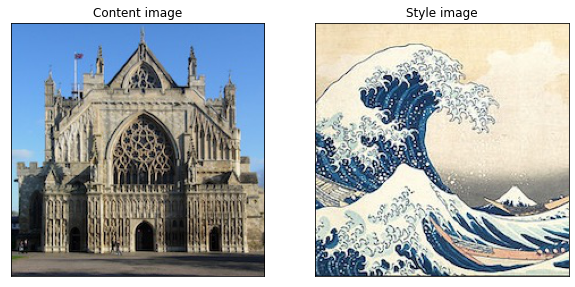

In [4]:
# View style and content images
plt.figure(figsize=(10,5))

# Show content image
plt.subplot(1,2,1)
cm.image.display()
plt.title('Content image')

# Show style image
plt.subplot(1,2,2)
sm[0].image.display()
plt.title('Style image')

plt.show()

# Train model and generate images

In [5]:
nst.set_iterations(20)
nst.training_loop()

Cost at 0: 13733986304.0. Time elapsed: 8.180111169815063
Cost at 1: 8505728512.0. Time elapsed: 15.892473220825195
Cost at 2: 5336612352.0. Time elapsed: 22.83988356590271
Cost at 3: 4128448768.0. Time elapsed: 29.227790594100952
Cost at 4: 3317499392.0. Time elapsed: 35.92387533187866
Cost at 5: 2789864192.0. Time elapsed: 42.83837151527405
Cost at 6: 2499667200.0. Time elapsed: 49.860586643218994
Cost at 7: 2264963072.0. Time elapsed: 56.69230246543884
Cost at 8: 2034289024.0. Time elapsed: 63.41132044792175
Cost at 9: 1824829568.0. Time elapsed: 70.12735033035278
Cost at 10: 1641277184.0. Time elapsed: 76.71173620223999
Cost at 11: 1471980544.0. Time elapsed: 83.49258995056152
Cost at 12: 1319641600.0. Time elapsed: 90.82796001434326
Cost at 13: 1195698304.0. Time elapsed: 97.93095231056213
Cost at 14: 1100299520.0. Time elapsed: 104.50336599349976
Cost at 15: 1022350912.0. Time elapsed: 111.21640276908875
Cost at 16: 955063680.0. Time elapsed: 117.99027824401855
Cost at 17: 893697

Display the content and style images along with the best generated image.

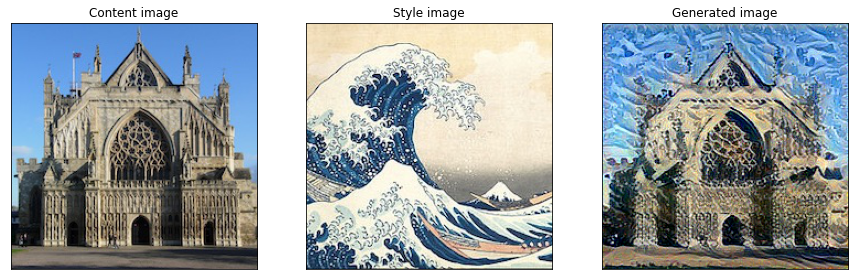

In [6]:
nst.show_results()

Display generated images from each iteration of training loop.

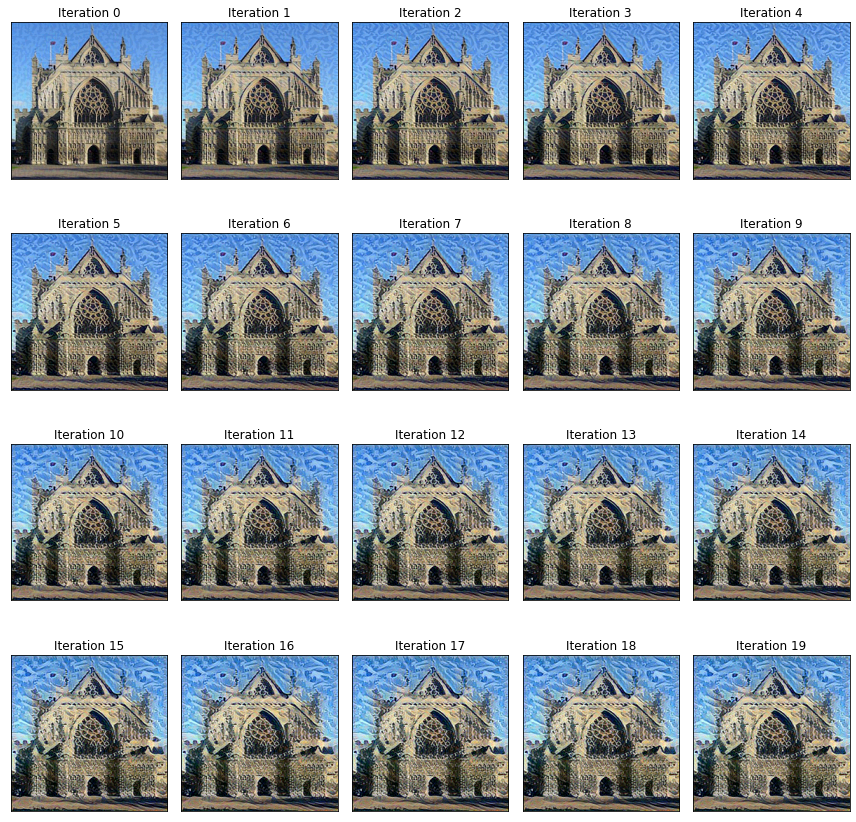

In [7]:
nst.show_generated_images()

Save the best image.

In [8]:
nst.best_image.save('generated.jpg')